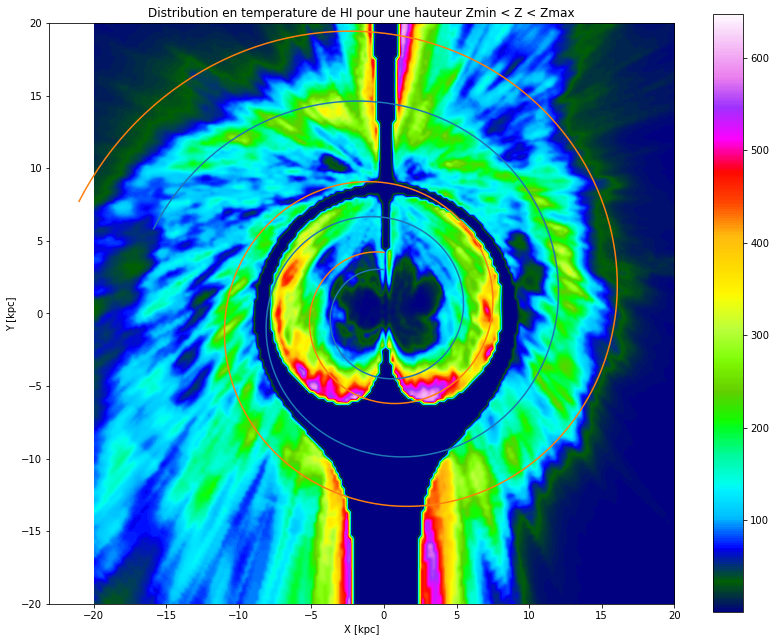

In [3]:
from main_functions import *

warnings.filterwarnings('ignore')
%matplotlib inline

hdulist=pyfits.open("../Data/lab.fit")
prihdr=hdulist[0].header
data2=hdulist[0].data
#
xmin=-20. #borne inferieure de l'intervalle sur l'axe des x
xmax=20. #borne superieure
xincr=0.2 #pas sur l'axe des x
ymin=-20. #borne inferieure de l'intervalle sur l'axe des y
ymax=20. #borne superieure
yincr=0.2 #pas sur l'axe des y

ZZ=1
NN=4
Nz=ZZ*NN*2
B=zeros((200,200), float)
for i in range(Nz):
    Z=-ZZ+i/NN #hauteur du plan dans lequel on veut voir la galaxie
    dV=1.
    #
    x=arange(xmin,xmax,xincr) #ici xmin et xmax sont les valeurs minimale et maximale de l'intervalle sur lequel on veut plot et xincr le pas entre chaque points
    y=arange(ymin,ymax,yincr) #parei que pour x
    X,Y = np.meshgrid(x,y)
    R=np.sqrt(X**2+Y**2) #calcul des valeurs de R pour chaque X et Y
    TETA=np.arctan2(Y,X)+pi/2 #calcul des valeurs de TETA pour chaque X et Y
    #
    A=milkyway_z(xmin,xmax,xincr,ymin,ymax,yincr,Z,dV,data2,prihdr) #appel de la fonction qui donne un plot du plan orthogonal a l'axe des z
    B=B+A
#
#plt.pcolormesh(X,Y,A) # si on ne veut pas d'interpolation
#B[where(B>700)]=0.
plt.figure(1,figsize=(14,11))
plt.imshow(B, interpolation='bicubic', origin='lower', extent=[xmin,xmax,ymin,ymax], cmap='gist_ncar') # plot avec interpolation
#plt.imshow(B, interpolation='bicubic', origin='lower', extent=[xmin,xmax,ymin,ymax]) # plot avec interpolation
plt.colorbar()


spirale1x=zeros((360), float)
spirale1y=zeros((360), float)
psi1=8.
phi01=0.*pi/180.
r1=2.48

spirale2x=zeros((360), float)
spirale2y=zeros((360), float)
psi2=8.25
phi02=0.14*pi/180.
r2=3.48

rr=zeros((360), float)
theta=zeros((360), float)
for i in range(360):
    rr[i]=i*50./360
    for j in range(360):
        theta[j]=(float(2.2*i)+90.)*pi/180.
        spirale1x[i]=r1*cos(theta[j])*exp(1./(psi1)*(theta[j]-phi01))
        spirale1y[i]=r1*sin(theta[j])*exp(1./(psi1)*(theta[j]-phi01))
        spirale2x[i]=r2*cos(theta[j])*exp(1./(psi2)*(theta[j]-phi02))
        spirale2y[i]=r2*sin(theta[j])*exp(1./(psi2)*(theta[j]-phi02))

plt.plot(spirale1x, spirale1y)
plt.plot(spirale2x, spirale2y)

plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.title('Distribution en temperature de HI pour une hauteur Zmin < Z < Zmax')
plt.show()